### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_df = pd.read_csv('titanic.csv.bz2')

In [3]:
titanic_df.shape

(1309, 14)

In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [6]:
titanic_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Survived

In [11]:
pd.value_counts(titanic_df.survived)

0    809
1    500
Name: survived, dtype: int64

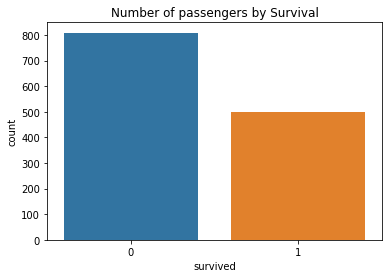

In [12]:
# Distribution of output label
f,ax=plt.subplots(figsize=(6,4))
sns.countplot(x = 'survived', data=titanic_df, ax=ax)
ax.set_title('Number of passengers by Survival')
plt.show()

Out of 1309 passengers, only 500 survived

### Analyzing features

#### Sex

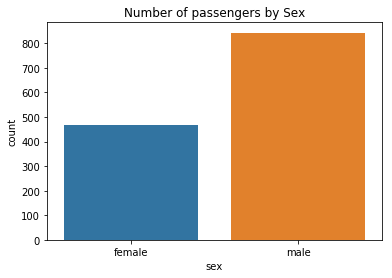

In [14]:
f,ax=plt.subplots(figsize=(6,4))
sns.countplot(x = 'sex', data=titanic_df, ax=ax)
ax.set_title('Number of passengers by Sex')
plt.show()

There are twice as many males as there are females in the ship.

Now, we will check the survival rate of males and females

In [15]:
titanic_df.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

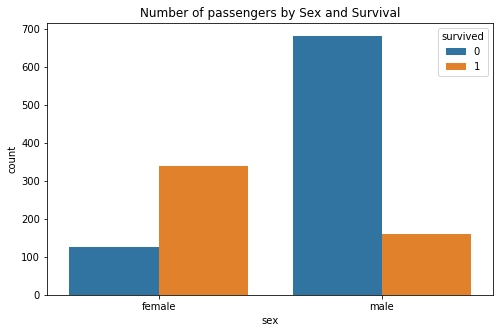

In [16]:
f,ax=plt.subplots(figsize=(8,5))
sns.countplot(x='sex', hue='survived', data=titanic_df, ax=ax)
ax.set_title('Number of passengers by Sex and Survival')
plt.show()

Despite the number of men being more than the number of women in the ship, the number of females saved is more than the number of men saved.

#### pclass

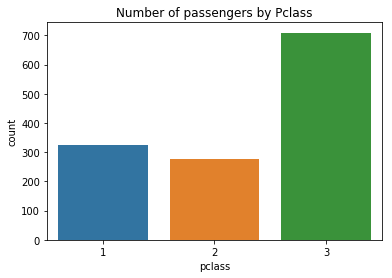

In [17]:
# Distribution by pclass
f, ax=plt.subplots(figsize=(6,4))
sns.countplot(x='pclass', data=titanic_df)
ax.set_title('Number of passengers by Pclass')
plt.show()

The number of passengers for pclass = 3 is more than twice as compared to 1 and 2.

In [18]:
titanic_df.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

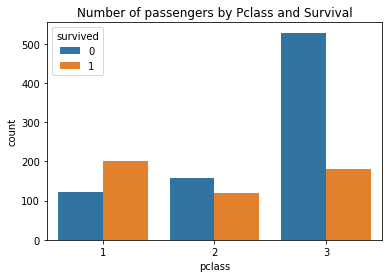

In [20]:
# Distribution by pclass and survival
f, ax=plt.subplots(figsize=(6,4))
sns.countplot(x='pclass', hue='survived', data=titanic_df)
ax.set_title('Number of passengers by Pclass and Survival')
plt.show()

Despite the number of passengers being more in pclass=3, their survival rate is very low. More than 70% of people died in pclass=3 and more than 60% of people were saved in pclas=1. In pclass=2, about 50% were saved.

Clearly, this reveals that people in plclass=1 were given priority while rescue.

#### Sex and Pclass

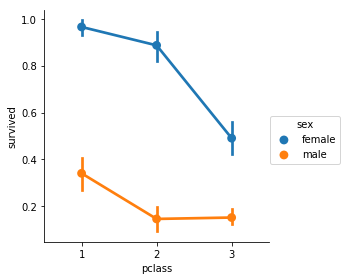

In [21]:
sns.factorplot('pclass', 'survived', hue='sex', data=titanic_df)
plt.show()

Clearly, priority was given to women. Proportion of women saved even in pclass 3 was more than that of men in class 1. 

Survival for women in pclass 1 is very close to 97%.

#### Age

In [22]:
titanic_df['age'].max(), titanic_df['age'].min(), titanic_df['age'].mean()

(80.0, 0.1667, 29.8811345124283)

In [23]:
titanic_df['age'].isnull().sum()

263

Since null values are very high, we cannot ignore these records. We try to figure out their age with the help of the prefix/title in their names

In [25]:
titanic_df['prefix']=titanic_df.name.str.extract('([A-Za-z]+)\.')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,prefix
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [26]:
titanic_df['prefix'].isnull().sum()

0

In [27]:
pd.value_counts(titanic_df['prefix'])

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Dona          1
Mme           1
Countess      1
Don           1
Jonkheer      1
Capt          1
Sir           1
Lady          1
Name: prefix, dtype: int64

In [32]:
titanic_df['prefix'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss'],inplace=True)

In [33]:
#Find mean age for each prefix/title
titanic_df.groupby('prefix')['age'].mean()

prefix
Master     5.482704
Miss      21.914341
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: age, dtype: float64

In [35]:
# replacing null values with mean of their respective groups
titanic_df.loc[(titanic_df.age.isnull())&(titanic_df.prefix=='Mr'),'age']=33
titanic_df.loc[(titanic_df.age.isnull())&(titanic_df.prefix=='Mrs'),'age']=37
titanic_df.loc[(titanic_df.age.isnull())&(titanic_df.prefix=='Master'),'age']=5
titanic_df.loc[(titanic_df.age.isnull())&(titanic_df.prefix=='Miss'),'age']=22
titanic_df.loc[(titanic_df.age.isnull())&(titanic_df.prefix=='Other'),'age']=45

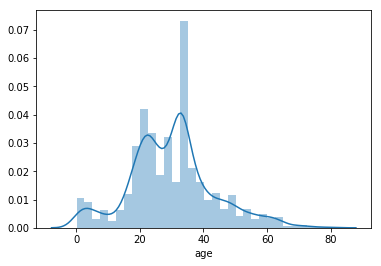

In [37]:
# Distribution of age
sns.distplot(titanic_df.age)

Majority of the people are between 20 and 60. To better analyze, let's convert age into bins.

In [38]:
#Create bins and binlabels
ageBins = np.arange(0, 80, 10)
ageBinLabels = ['{}s'.format(i) for i in ageBins[:-1]]
ageBinLabels

['0s', '10s', '20s', '30s', '40s', '50s', '60s']

In [41]:
# create a feature ageGroup to categorize age groups
titanic_df['ageGroup'] = pd.cut(titanic_df.age, bins=ageBins, labels = ageBinLabels)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,prefix,ageGroup
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,20s
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,0s
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,0s
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,20s
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,20s


In [43]:
titanic_df.groupby(['ageGroup', 'survived'])['survived'].count()

ageGroup  survived
0s        0            41
          1            53
10s       0            98
          1            64
20s       0           248
          1           164
30s       0           285
          1           129
40s       0            80
          1            52
50s       0            32
          1            30
60s       0            21
          1             6
Name: survived, dtype: int64

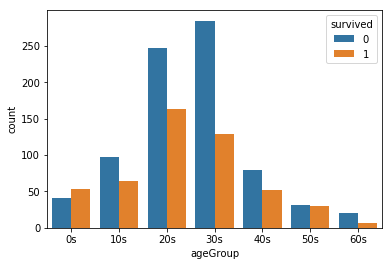

In [44]:
sns.countplot('ageGroup', hue='survived', data=titanic_df)

We see that there are a lot of children in the ship and around 40% of them have survived. Survival rate of people in their 20's is similar. 

30's age group experienced a lower survival rate. They might me helping others the most while rescue.

40's, 50's age groups have a pretty good survival rate.

60's age group again experiences a very low survival rate.

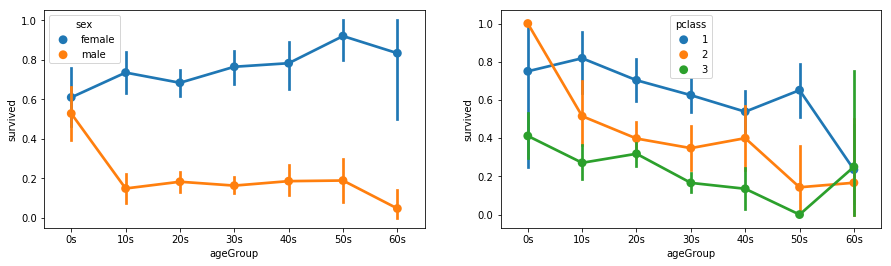

In [46]:
# analysing sex, agegroups, pclass together
f, ax = plt.subplots(1,2, figsize=(15,4))
sns.factorplot('ageGroup', 'survived', hue='sex', data=titanic_df, ax=ax[0])
plt.close(2)
sns.factorplot('ageGroup', 'survived', hue='pclass', data=titanic_df, ax=ax[1])
plt.close(2)
plt.show()

Children below 10 years of age have a good survival rate irrespective of their gender. For people above 60, women have quite a good survival, whereas men have very low survival rates. The survival rate goes up with increasing age in women but goes down with increasing age in men.

People above 60 years of age have an average survival rate irrespective of their pclass. Similarly, we can't see any trend with respect to pclass for children below 10 years of age. Their survival rate looks good irrespective of their class.

#### Embarked

In [47]:
titanic_df.embarked.isnull().sum()

2

In [49]:
pd.value_counts(titanic_df.embarked)

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [51]:
# replacing NA fields with maximum occurence of embarked value
titanic_df.embarked.fillna('S', inplace = True)

Text(0.5,1,'Embarked and Survived: Distribution of passengers boarding from ports')

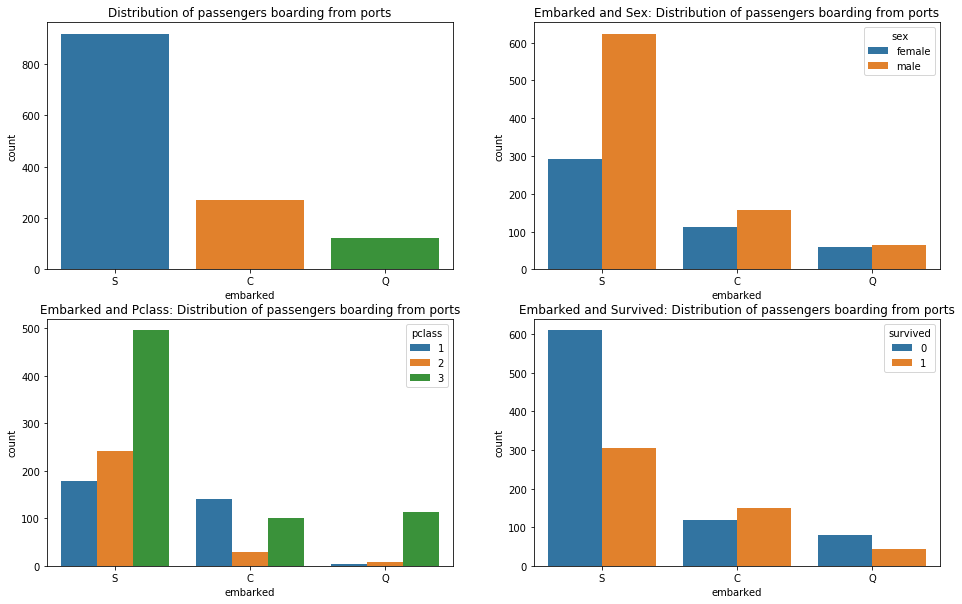

In [53]:
f, ax=plt.subplots(2,2,figsize=(16,10))
sns.countplot('embarked', data=titanic_df, ax=ax[0,0])
ax[0,0].set_title('Distribution of passengers boarding from ports')
sns.countplot('embarked',hue='sex', data=titanic_df, ax=ax[0,1])
ax[0,1].set_title('Embarked and Sex: Distribution of passengers boarding from ports')
sns.countplot('embarked',hue='pclass', data=titanic_df, ax=ax[1,0])
ax[1,0].set_title('Embarked and Pclass: Distribution of passengers boarding from ports')
sns.countplot('embarked',hue='survived', data=titanic_df, ax=ax[1,1])
ax[1,1].set_title('Embarked and Survived: Distribution of passengers boarding from ports')

Majority of the people, rich or poor boarded from Port S. Most of them were from pclass=3. Their survival rate is about 40%.

Passengers boarding from C have a pretty good survival rate. Most of them are from pclass=1. Their survival rate is about 60%.

Very few boarded from port Q. Most of them were from pclass=3. Despite most of them being from pclass=3, their survival rate is around 60%.

Text(0.5,1,'Survival Rate with respect to Embarked')

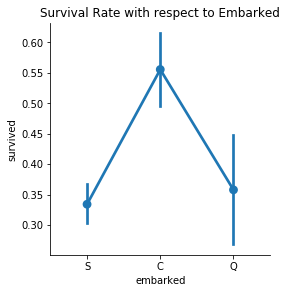

In [54]:
sns.factorplot('embarked', 'survived', data=titanic_df)
plt.title('Survival Rate with respect to Embarked')

Survival Rate is maximum for people boarding from port C, followed by port Q and then S.

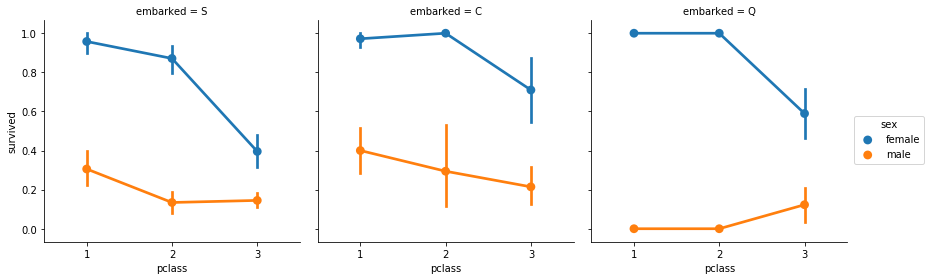

In [65]:
# analysing embarked and pclass together with survival rate
sns.factorplot('pclass', 'survived', hue='sex', col='embarked', data=titanic_df)
plt.show()

Women have a survival rate of almost 1 irrespective of their pclass. 

Port S sees a very low survival rate for pclass=3 for both men and women. 

Port Q sees a very sharp difference in survival rates of males and females.

#### SibSp and Parch
These fields are concerned with siblings, spouse, parents and children. Basically, if the person is traveling alone or with family. We now engineer another feature 'alone' on the basis of these 2 features.

In [57]:
pd.value_counts(titanic_df.sibsp)

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [58]:
pd.value_counts(titanic_df.parch)

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: parch, dtype: int64

In [59]:
# creating 'alone' feature - 0 in both means that the person is traveling alone.
titanic_df['alone'] = titanic_df.sibsp + titanic_df.parch

In [60]:
titanic_df['alone'].loc[titanic_df['alone']>0] = 'With Family'
titanic_df['alone'].loc[titanic_df['alone']==0] = 'Alone'

In [61]:
pd.value_counts(titanic_df.alone)

Alone          790
With Family    519
Name: alone, dtype: int64

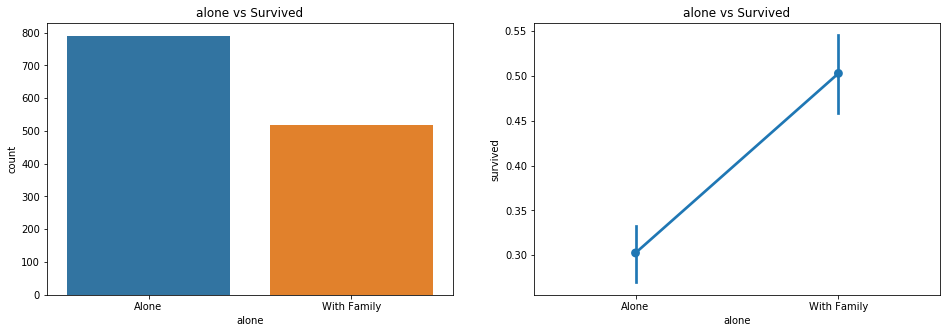

In [63]:
f,ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot('alone',data=titanic_df,ax=ax[0])
ax[0].set_title('alone vs Survived')
sns.factorplot('alone','survived',data=titanic_df,ax=ax[1])
ax[1].set_title('alone vs Survived')
plt.close(2)
plt.show()

The number of people traveling is more than that with family. Also, the survival rate of people with families is around 50% and those traveling alone have a low survival rate of 27%.

We can infer that people traveling alone don't have anyone to help them rescue. Whereas if the family is present, they try to be each other's support and save one another. Many might have died while saving their family members, hence their survival rate is 50%.

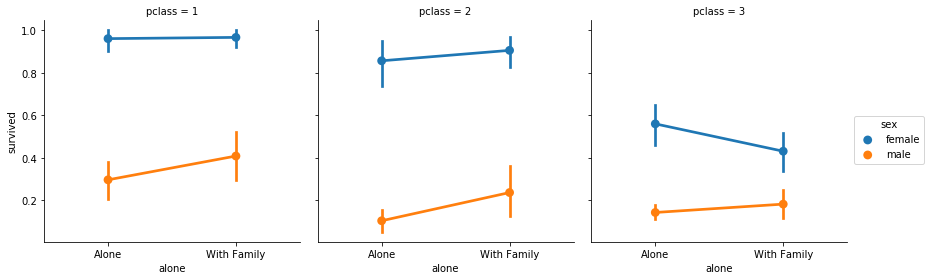

In [64]:
sns.factorplot('alone', 'survived', hue='sex', col='pclass', data=titanic_df)
plt.show()

Men traveling alone have less survival rate than men traveling with family. 

Females have a survival rate of almost 97% in pclass=1 irrespective of the 'alone'factor.

For pclass=2, women with familes have a higher survival rate than those traveling alone.

Females with family have a lower survival rate than females traveling alone in pclass=3. They might have tried to save their children first.